In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
raw1 = pd.read_csv(r'D:\Code Library\FIN3080\Assignment_3\daily data\daily_1.csv')
raw2 = pd.read_csv(r'D:\Code Library\FIN3080\Assignment_3\daily data\daily_2.csv')
df = raw1.append(raw2).reset_index(drop = True)
df = df.rename(columns = {'ChangeRatio':'ret'})
df

,Symbol,TradingDate,ret
0,300,2015-01-01,0.000000
1,300,2015-01-02,0.000000
2,300,2015-01-05,0.030516
3,300,2015-01-06,-0.000132
4,300,2015-01-07,0.000750
...,...,...,...
3649,399006,2021-12-27,-0.000999
3650,399006,2021-12-28,0.010549
3651,399006,2021-12-29,-0.014019
3652,399006,2021-12-30,0.012462


In [3]:
df1 = df[df.Symbol == 300].reset_index(drop = True)
df1

,Symbol,TradingDate,ret
0,300,2015-01-01,0.000000
1,300,2015-01-02,0.000000
2,300,2015-01-05,0.030516
3,300,2015-01-06,-0.000132
4,300,2015-01-07,0.000750
...,...,...,...
1822,300,2021-12-27,-0.000411
1823,300,2021-12-28,0.007448
1824,300,2021-12-29,-0.014626
1825,300,2021-12-30,0.007788


In [4]:
df2 = df[df.Symbol == 399006].reset_index(drop = True)
df2

,Symbol,TradingDate,ret
0,399006,2015-01-01,0.000000
1,399006,2015-01-02,0.000000
2,399006,2015-01-05,-0.004749
3,399006,2015-01-06,0.051239
4,399006,2015-01-07,-0.010677
...,...,...,...
1822,399006,2021-12-27,-0.000999
1823,399006,2021-12-28,0.010549
1824,399006,2021-12-29,-0.014019
1825,399006,2021-12-30,0.012462


In [5]:
mu1 = df1.ret.mean()
sigma1 = df1.ret.std()
print(mu1)
print(sigma1)

0.0002865758073344275
0.014304857203189502


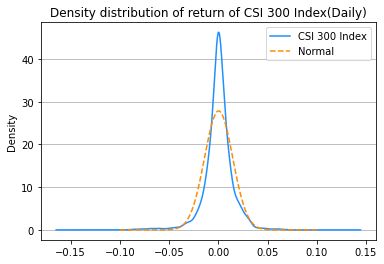

In [6]:
df1.ret.plot.density(color = 'dodgerblue', label = 'CSI 300 Index')
x = np.linspace(-0.1, 0.1, 100)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1), linestyle = '--',color = 'darkorange', label = 'Normal')
plt.title('Density distribution of return of CSI 300 Index(Daily)')
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [7]:
norm_stats1, p1 = stats.normaltest(df1.ret)
p1

9.84856837134954e-91

In [8]:
ks_stats1 = stats.kstest(df1.ret, 'norm', (mu1,sigma1))
ks_stats1

KstestResult(statistic=0.10512733450515127, pvalue=4.910663626956134e-18)

In [9]:
mu2 = df2.ret.mean()
sigma2 = df2.ret.std()
print(mu2)
print(sigma2)

0.0006377931034482763
0.019540744962259285


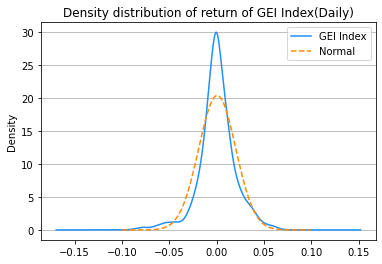

In [10]:
df2.ret.plot.density(color = 'dodgerblue', label = 'GEI Index')
x = np.linspace(-0.1, 0.1, 100)
plt.plot(x, stats.norm.pdf(x, mu2, sigma2), linestyle = '--',color = 'darkorange', label = 'Normal')
plt.title('Density distribution of return of GEI Index(Daily)')
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [11]:
norm_stats2, p2 = stats.normaltest(df2.ret)
p2

1.3119555166783467e-38

In [12]:
ks_stats2 = stats.kstest(df2.ret, 'norm', (mu2, sigma2))
ks_stats2

KstestResult(statistic=0.0876536027486024, pvalue=1.1579455752048461e-12)